# Steps

1. Find unique values, missing data, shape of df
2. Visualize ratings
3. Frequency plot of ratings
4. How often was a product rated a particular rating
5. Convert timestamp to something useable
6. 

In [34]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [35]:
#Importing Data

df = pd.read_csv('Datasets/Amazon Reviews.csv', names = ['User ID','Product ID','Rating','Time Stamp'], nrows=100000)
df['Time Stamp'] = df['Time Stamp'].apply(lambda x:datetime.fromtimestamp(x))
df = df.rename(columns={'Time Stamp':'Date'})
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13 04:00:00
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01 04:00:00
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29 04:00:00
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22 04:00:00
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18 04:00:00


In [36]:
df['Date'].dt.hour.value_counts()

4    100000
Name: Date, dtype: int64

### Since the time part of the time stamp is all at the same exact time we can omit it from the column

In [37]:
df['Date'] = df['Date'].dt.date
df.head()

,User ID,Product ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,2013-04-13
1,A2CX7LUOHB2NDG,0321732944,5.0,2012-07-01
2,A2NWSAGRHCP8N5,0439886341,1.0,2013-04-29
3,A2WNBOD3WNDNKT,0439886341,3.0,2013-07-22
4,A1GI0U4ZRJA8WN,0439886341,1.0,2012-04-18


# Data Exploration

In [38]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :\n',df.nunique())
print('\nMissing values in columns:\n',df.isnull().sum())
print('\nDuplicated rows: \n',df.duplicated().value_counts())
print('\nData Types of each column: \n', df.dtypes)

Rows     : 100000
Columns  : 4

Features :
     : ['User ID', 'Product ID', 'Rating', 'Date']

Missing values    : 0

Unique values :
 User ID       89938
Product ID     6918
Rating            5
Date           5477
dtype: int64

Missing values in columns:
 User ID       0
Product ID    0
Rating        0
Date          0
dtype: int64

Duplicated rows: 
 False    100000
dtype: int64

Data Types of each column: 
 User ID        object
Product ID     object
Rating        float64
Date           object
dtype: object


# Data Visualization

<AxesSubplot:xlabel='Rating', ylabel='count'>

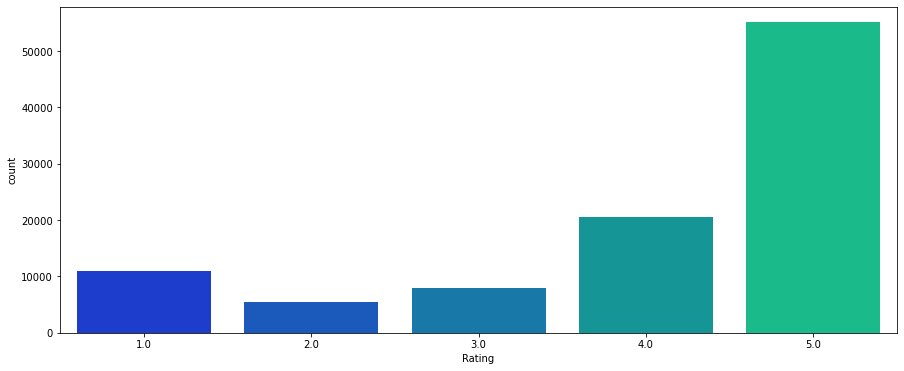

In [4]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Rating', palette = 'winter')

## Number of User Ratings

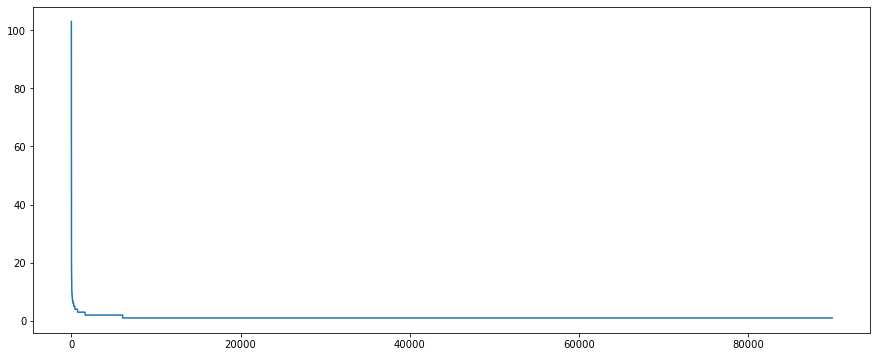

In [11]:
number_of_ratings = df.groupby('User ID')['Rating'].count().sort_values(ascending=False)

plt.figure(figsize=(15,6))
plt.plot(number_of_ratings.values)

Above we can see the number of ratings each user has given in the data set. The maximum rating any user has given is **Max Number**

## Time Series Visualizations

1. How the number of orders changed throughout time
2. What time of the year is busiest
3. How correlated are the number of orders with holidays
4. How many products are ordered throughout the week. Are there higher numbers during weekends than weekdays?
5. For how many days of the month do we have data?
6. For ease f visualizations take time for only the past decade.

In [27]:

#Set the time stamp as the index
df.reset_index(drop=True,inplace=True)
df.sort_values('Date', ascending=True,inplace=True)
df.set_index('Date',inplace=True)
df.head()

,User ID,Product ID,Rating
Date,,,
1998-12-04,A2ZUNCI13N2OUL,B00000DM9D,4.0
1998-12-07,A28AXJL31RXUON,B00000DM9M,4.0
1998-12-18,AFHLJPG5ZIMNO,B00000DM96,5.0
1998-12-26,AY2NE9ZEZ5LCE,B00000DM9D,5.0
1999-05-02,A2LG0LV5RI86F0,B00000DM93,5.0


We can already begin to see that there are gaps in the dates. We do not have data for all days of the months.

<AxesSubplot:xlabel='Date', ylabel='count'>

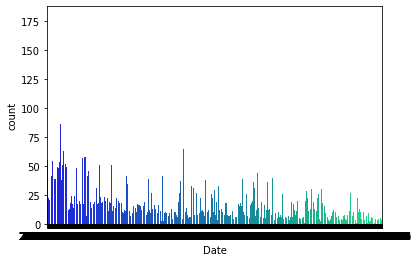

In [46]:
sns.countplot(data=df, x='Date', palette='winter')

In [45]:
df.groupby('Date').count()

,User ID,Product ID,Rating
Date,,,
1998-12-04,1,1,1
1998-12-07,1,1,1
1998-12-18,1,1,1
1998-12-26,1,1,1
1999-05-02,1,1,1
...,...,...,...
2014-07-18,11,11,11
2014-07-19,6,6,6
2014-07-20,18,18,18
